##Importing Libraries & EDA


In [1]:
import pandas as pd
import numpy as np

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
df.shape

(14640, 15)

In [5]:
df = pd.DataFrame(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [8]:
df['name'].value_counts().count()

7701

In [9]:
df['user_timezone'].value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                          738
Atlantic Time (Canada)         497
                              ... 
Warsaw                           1
Bucharest                        1
Wellington                       1
Sarajevo                         1
Saskatchewan                     1
Name: user_timezone, Length: 85, dtype: int64

In [10]:
cols_drop = ['tweet_id','tweet_location','user_timezone','tweet_coord','negativereason_gold','airline_sentiment_gold','negativereason_confidence','negativereason']
dt = df.drop(columns = cols_drop)
dt.head()

airline_sentiment  airline_sentiment_confidence         airline        name  \
0           neutral                        1.0000  Virgin America     cairdin   
1          positive                        0.3486  Virgin America    jnardino   
2           neutral                        0.6837  Virgin America  yvonnalynn   
3          negative                        1.0000  Virgin America    jnardino   
4          negative                        1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created  
0  2015-02-24 11:35:52 -0800  
1  2015-02-24 11:15:59 -0800  
2  2015-02-24 11:15:48 -0800  
3  2015-02-24 11:15:36 -0800  
4  2015-02-24 11:14:45 -0800

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  object 
 3   name                          14640 non-null  object 
 4   retweet_count                 14640 non-null  int64  
 5   text                          14640 non-null  object 
 6   tweet_created                 14640 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 800.8+ KB


In [12]:
dt['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [13]:
dt['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

# Function for Word Cloud

In [14]:
def generate_word_cloud(dataset, column_name):
    text = ' '.join(dataset[column_name].astype(str).tolist())

    wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#Function for percentage share of different sentiment categories in a dataset

In [15]:
def calculate_sentiment_percentage(dataset, column_name):
    sentiment_counts = dataset[column_name].value_counts()
    total = sentiment_counts.sum()
    percentages = (sentiment_counts / total) * 100
    return percentages

#Function for value counts of Tweets for airline

In [59]:
def calculate_sentiment_count(dataset, column_name):
    sentiment_airline_counts = dataset[column_name].value_counts()
    return sentiment_airline_counts

##United Airways

In [16]:
df_united = dt[dt['airline'] == 'United']
df_united.head()

airline_sentiment  airline_sentiment_confidence airline            name  \
504          positive                        1.0000  United      rdowning76   
505          positive                        1.0000  United   CoreyAStewart   
506          negative                        1.0000  United  CoralReefer420   
507          negative                        1.0000  United      lsalazarll   
508          positive                        0.3441  United          rombaa   

     retweet_count                                               text  \
504              0                                     @united thanks   
505              0  @united Thanks for taking care of that MR!! Ha...   
506              0  @united still no refund or word via DM. Please...   
507              0  @united Delayed due to lack of crew and now de...   
508              0  @united thanks -- we filled it out. How's our ...   

                 tweet_created  
504  2015-02-24 11:42:48 -0800  
505  2015-02-24 11:42:41 -0800  
506  2015-02-24 11:39:45 -0800  
507  2015-02-24 11:39:25 -0800  
508  2015-02-24 11:38:15 -0800

### Value Counts of Sentiment

In [58]:
calculate_sentiment_count(df_united,'airline_sentiment')

negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64

### % share in United Airways Airlines

In [17]:
percentages = calculate_sentiment_percentage(df_united, 'airline_sentiment')
print(percentages)

negative    68.890633
neutral     18.236525
positive    12.872841
Name: airline_sentiment, dtype: float64


In [18]:
df_united_positive = df_united[df_united['airline_sentiment']=='positive']
df_united_neutral = df_united[df_united['airline_sentiment']=='neutral']
df_united_negative = df_united[df_united['airline_sentiment']=='negative']

### United Airlines Positive WordCloud

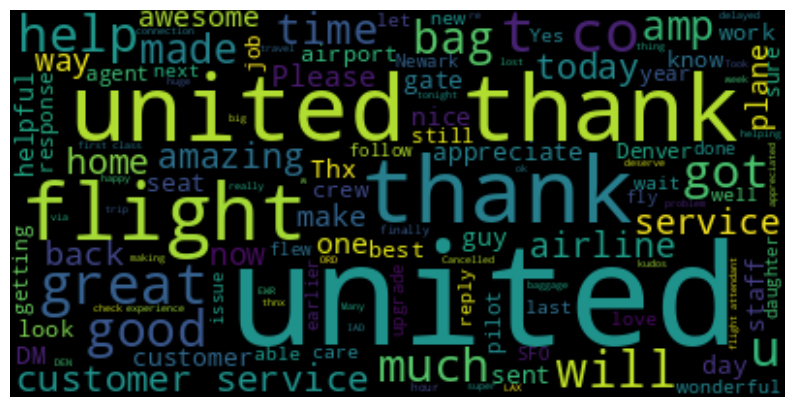

In [19]:
generate_word_cloud(df_united_positive, 'text')

This Positive word cloud shows us that the great service offered by the **customer service, flight crew, and staff** was appreciated. Hence, this should be maintained and sustained, especially the great work by the teams at **Denver** Airport.

### United Airlines Negative Wordcloud

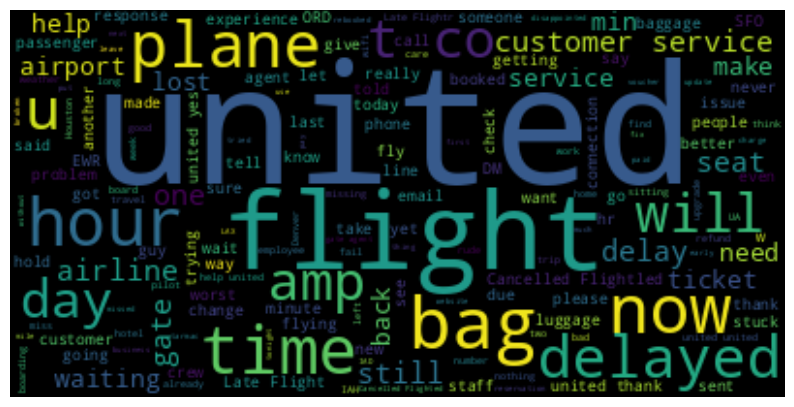

In [20]:
generate_word_cloud(df_united_negative, 'text')

This negative word cloud indicates that customers were experiencing delays, cancellations, and subpar customer service, with **delays/cancellations being the primary epicenter of problems**, particularly at Los Angeles Airport. Hence, services at LA Airport Authority should be improved to ensure that people do not face such situations that affect their travel experiences.

### United Airlines Neutral United Wordcloud

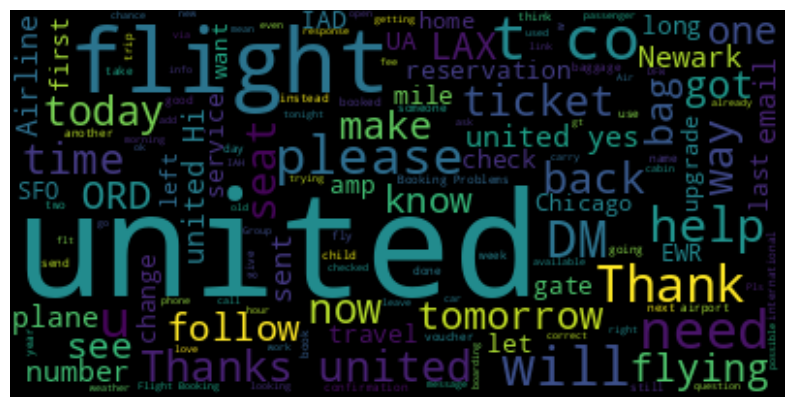

In [21]:
generate_word_cloud(df_united_neutral, 'text')

This neutral word cloud of United Airlines shows us that the tweets were related to **reservations, tickets, emails, and web check-ins**, which can be simplified to potentially contribute to a more positive sentiment.

## US Airways

In [22]:
df_usair = dt[dt['airline'] == 'US Airways']
df_usair.head()

airline_sentiment  airline_sentiment_confidence     airline  \
8966          negative                        0.6292  US Airways   
8967          negative                        1.0000  US Airways   
8968           neutral                        1.0000  US Airways   
8969           neutral                        1.0000  US Airways   
8970          negative                        1.0000  US Airways   

                 name  retweet_count  \
8966        jhazelnut              0   
8967         GAKotsch              0   
8968    DebbiMcGinnis              0   
8969  AshleyKAtherton              0   
8970    retardedlarry              0   

                                                   text  \
8966  @USAirways  is there a better time to call? My...   
8967  @USAirways and when will one of these agents b...   
8968  @USAirways is a DM possible if you aren't foll...   
8969  @USAirways Fortunately you have staff like Lyn...   
8970  @USAirways just hung up on me again.  Another ...   

                  tweet_created  
8966  2015-02-24 11:53:37 -0800  
8967  2015-02-24 11:51:48 -0800  
8968  2015-02-24 11:48:37 -0800  
8969  2015-02-24 11:47:16 -0800  
8970  2015-02-24 11:46:28 -0800

### Value counts of Sentiment US Airways

In [60]:
calculate_sentiment_count(df_usair,'airline_sentiment')

negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64

### % share in US Airways Airlines

In [23]:
percentages = calculate_sentiment_percentage(df_usair, 'airline_sentiment')
print(percentages)

negative    77.686234
neutral     13.079300
positive     9.234466
Name: airline_sentiment, dtype: float64


In [24]:
df_usair_positive = df_usair[df_usair['airline_sentiment']=='positive']
df_usair_neutral = df_usair[df_usair['airline_sentiment']=='neutral']
df_usair_negative = df_usair[df_usair['airline_sentiment']=='negative']

### US Airways Positive WordCloud

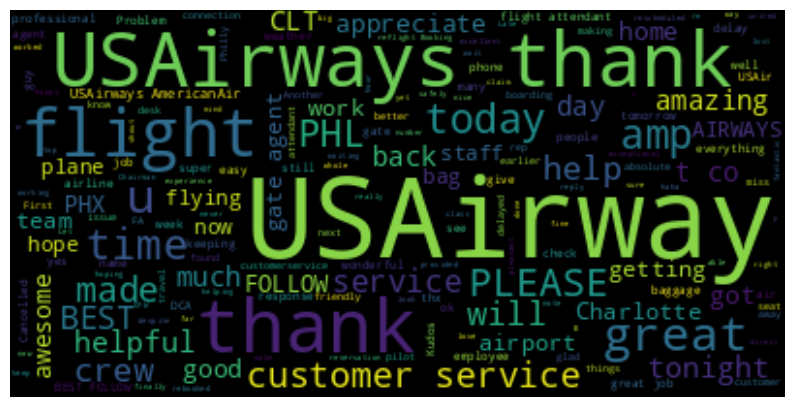

In [25]:
generate_word_cloud(df_usair_positive, 'text')

This Positive word cloud of US Airways shows us that the great service offered by the **customer service, flight crew, and plane** was appreciated.

### US Airways Negative WordCloud

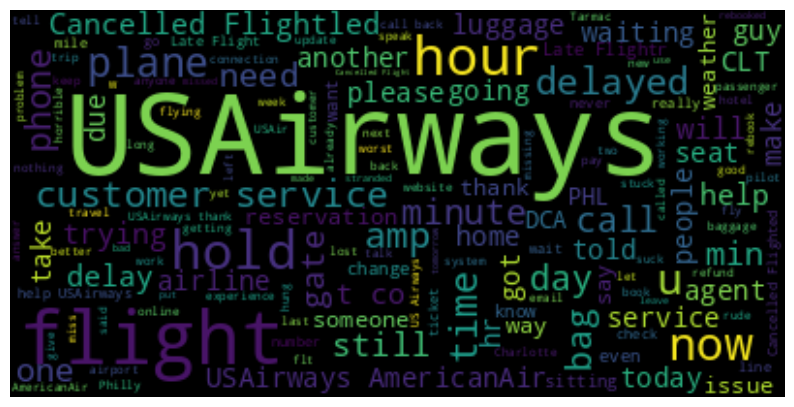

In [26]:
generate_word_cloud(df_usair_negative, 'text')

This negative word cloud of US Airways indicates that customers were **experiencing delays & cancellations due to weather problems, and subpar customer service which was being compared to American Airlines**.

### US Airways Neutral WordCloud

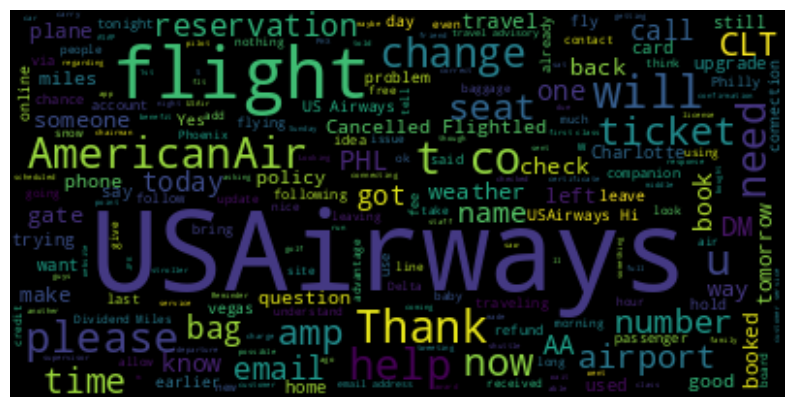

In [27]:
generate_word_cloud(df_usair_neutral, 'text')

This neutral word cloud of US Airways shows us that the tweets were related to **reservations, tickets, emails, and web check-ins**, which can be simplified to potentially contribute to a more positive sentiment.

## American

In [28]:
df_amc = dt[dt['airline'] == 'American']
df_amc.head()

airline_sentiment  airline_sentiment_confidence   airline  \
11879          negative                        1.0000  American   
11880           neutral                        0.6667  American   
11881          negative                        0.6316  American   
11882          negative                        0.6846  American   
11883          negative                        0.6547  American   

                  name  retweet_count  \
11879       SweeLoTmac              0   
11880  LancasterPattie              0   
11881        ELLLORRAC              0   
11882       SweeLoTmac              0   
11883      LauraMolito              0   

                                                    text  \
11879  @AmericanAir why would I even consider continu...   
11880  @AmericanAir we've already made other arrangem...   
11881  @AmericanAir thanks for getting back to me. Bu...   
11882  @AmericanAir why would I pay $200 to reactivat...   
11883  @AmericanAir stranded for 24 hours in MIA, Pat...   

                   tweet_created  
11879  2015-02-24 11:44:31 -0800  
11880  2015-02-24 11:43:32 -0800  
11881  2015-02-24 11:43:05 -0800  
11882  2015-02-24 11:43:05 -0800  
11883  2015-02-24 11:41:02 -0800

### Value counts of Sentiment American Airlines

In [61]:
calculate_sentiment_count(df_amc,'airline_sentiment')

negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64

### % share in American Airlines

In [29]:
percentages = calculate_sentiment_percentage(df_united, 'airline_sentiment')
print(percentages)

negative    68.890633
neutral     18.236525
positive    12.872841
Name: airline_sentiment, dtype: float64


In [30]:
df_amc_positive = df_amc[df_amc['airline_sentiment']=='positive']
df_amc_neutral = df_amc[df_amc['airline_sentiment']=='neutral']
df_amc_negative = df_amc[df_amc['airline_sentiment']=='negative']

### American Airlines Positive WordCloud

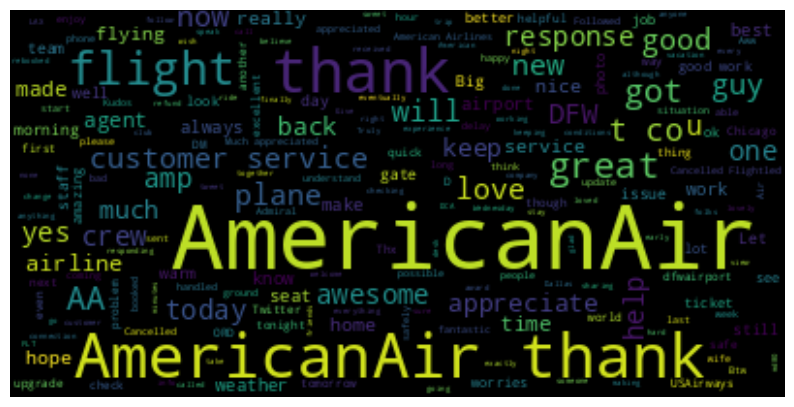

In [31]:
generate_word_cloud(df_amc_positive, 'text')

This positive word cloud of American Airlines shows us that the tweets were related to **Seat allocation & comfort, good service,and great flight experience**, which can be simplified to potentially contribute to a more positive sentiment.

### American Airlines Negative WordCloud

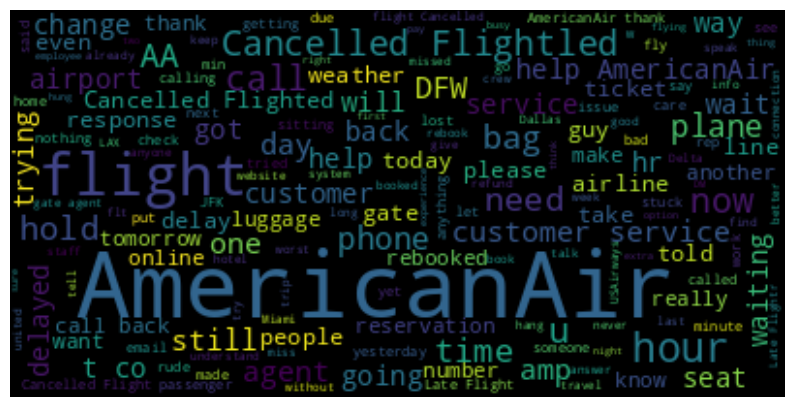

In [32]:
generate_word_cloud(df_amc_negative,'text')

This negative word cloud of American Airlines shows us that the tweets were related to **reservations, tickets, customer service, and web check-ins**, which can be very concerning for sustaining frequent travellers.

### American Airlines Neutral WordCloud

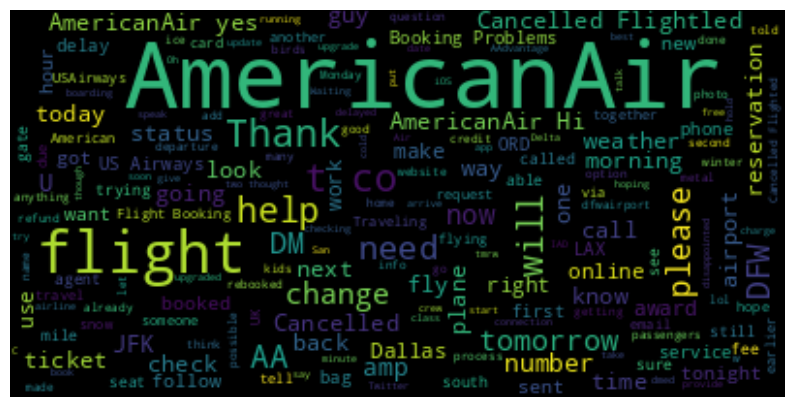

In [33]:
generate_word_cloud(df_amc_neutral,'text')

This neutral word cloud of American Airlines shows us that the tweets were related to **booking problems, cancelled flights and mostly were for flights to/from JFK(New York),Dallas,Los Angeles**, which can be simplified to potentially contribute to a more negative sentiment.

##Southwest

In [34]:
df_southwest = dt[dt['airline'] == 'Southwest']
df_southwest.head()

airline_sentiment  airline_sentiment_confidence    airline  \
4326          negative                        1.0000  Southwest   
4327          negative                        0.6361  Southwest   
4328          negative                        1.0000  Southwest   
4329           neutral                        0.6443  Southwest   
4330          negative                        1.0000  Southwest   

                name  retweet_count  \
4326     thisradlove              0   
4327       tomcblock              0   
4328  cindyjwhitaker              0   
4329    liveseasoned              0   
4330  cindyjwhitaker              0   

                                                   text  \
4326    @SouthwestAir still waiting. Just hit one hour.   
4327  @SouthwestAir although I'm not happy you Cance...   
4328  @SouthwestAir Hello - been on hold for extreme...   
4329  @SouthwestAir I'm teaching new #travelers how ...   
4330  @SouthwestAir Very frustrated for the loooooon...   

                  tweet_created  
4326  2015-02-24 11:47:53 -0800  
4327  2015-02-24 11:47:50 -0800  
4328  2015-02-24 11:41:45 -0800  
4329  2015-02-24 11:35:41 -0800  
4330  2015-02-24 11:33:56 -0800

### Value Counts of Sentiment

In [62]:
calculate_sentiment_count(df_southwest,'airline_sentiment')

negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64

### % share in Southwest Airlines

In [35]:
percentages = calculate_sentiment_percentage(df_southwest, 'airline_sentiment')
print(percentages)

negative    49.008264
neutral     27.438017
positive    23.553719
Name: airline_sentiment, dtype: float64


In [36]:
df_southwest_positive = df_southwest[df_southwest['airline_sentiment']=='positive']
df_southwest_neutral = df_southwest[df_southwest['airline_sentiment']=='neutral']
df_southwest_negative = df_southwest[df_southwest['airline_sentiment']=='negative']

### Southwest Airlines Positive WordCloud

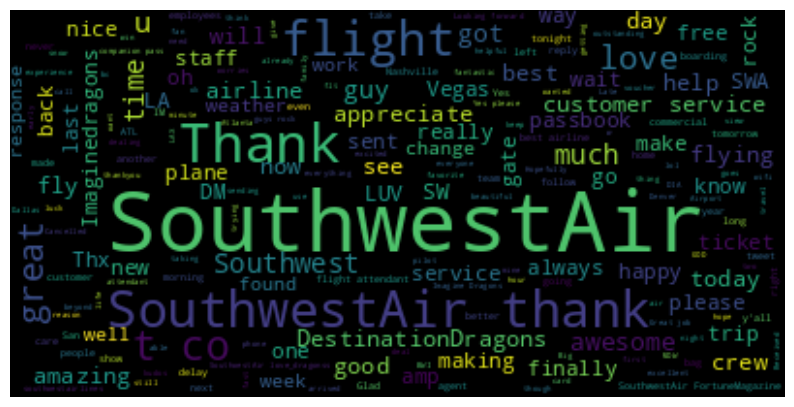

In [37]:
generate_word_cloud(df_southwest_positive, 'text')

This positive word cloud of South West Airlines shows us that the tweets were related to **Las Vegas jouneys, good service, great flight experience, and love for Imagine Dragons**, which can be simplified to potentially contribute to a more positive sentiment.

### Southwest Airlines Negative WordCloud

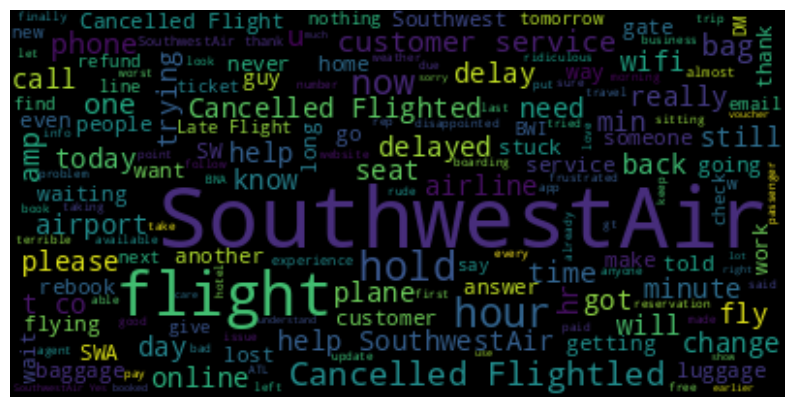

In [38]:
generate_word_cloud(df_southwest_negative, 'text')

This negative word cloud of Southwest Airlines indicates that customers were **experiencing delays & cancellations, and subpar customer service**, with subpar airport services as well.

### Southwest Airlines Neutral WordCloud

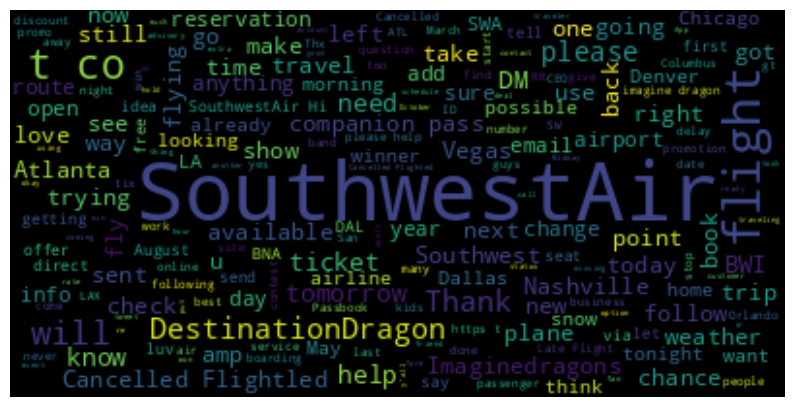

In [39]:
generate_word_cloud(df_southwest_neutral, 'text')

This neutral word cloud of South West Airlines shows us that the tweets were related to **Las Vegas jouneys, good service, great flight experience to/from Denver|Chicago|Dallas as well , and love for Imagine Dragons**, which can be simplified to potentially contribute to a more positive sentiment.

## Delta

In [40]:
df_delta = dt[dt['airline'] == 'Delta']
df_delta.head()

airline_sentiment  airline_sentiment_confidence airline             name  \
6746          positive                        0.6469   Delta           jaxbra   
6747           neutral                        0.6869   Delta  Oneladyyouadore   
6748           neutral                        1.0000   Delta  Oneladyyouadore   
6749          negative                        1.0000   Delta  Oneladyyouadore   
6750          negative                        1.0000   Delta  Oneladyyouadore   

      retweet_count                                               text  \
6746              0  @JetBlue Yesterday on my way from EWR to FLL j...   
6747              0  @JetBlue I hope so because I fly very often an...   
6748              0               @JetBlue flight 1041 to Savannah, GA   
6749              0  @JetBlue They weren't on any flight, they just...   
6750              0  @JetBlue everyone is here but our pilots are n...   

                  tweet_created  
6746  2015-02-24 11:48:38 -0800  
6747  2015-02-24 11:48:29 -0800  
6748  2015-02-24 11:45:20 -0800  
6749  2015-02-24 11:42:34 -0800  
6750  2015-02-24 11:32:49 -0800

### Value Counts of Sentiment

In [63]:
calculate_sentiment_count(df_delta,'airline_sentiment')

negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64

### % share in Delta Airlines

In [41]:
percentages = calculate_sentiment_percentage(df_delta, 'airline_sentiment')
print(percentages)

negative    42.979298
neutral     32.538254
positive    24.482448
Name: airline_sentiment, dtype: float64


In [42]:
df_delta_positive = df_delta[df_delta['airline_sentiment']=='positive']
df_delta_neutral = df_delta[df_delta['airline_sentiment']=='neutral']
df_delta_negative = df_delta[df_delta['airline_sentiment']=='negative']

### Delta Airlines Positive WordCloud

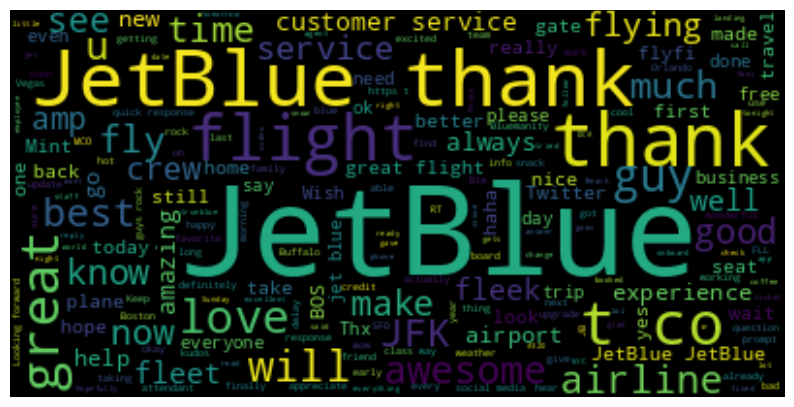

In [43]:
generate_word_cloud(df_delta_positive, 'text')

This positive word cloud of Delta Airlines shows us that the tweets were related to **Good service, great flight experience to/from New York (JFK)**.

### Delta Airlines Negative WordCloud

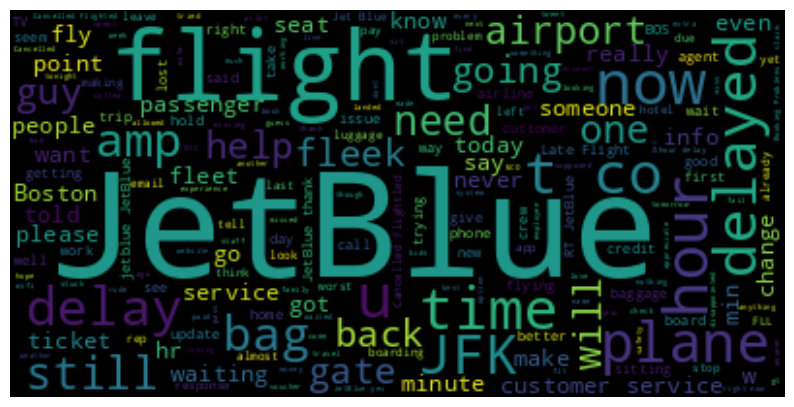

In [44]:
generate_word_cloud(df_delta_negative, 'text')

This negative word cloud of Delta Airlines indicates that customers were **experiencing delays, and subpar customer service, with subpar Boston airport services as well**.

### Delta Airlines Neutral WordCloud

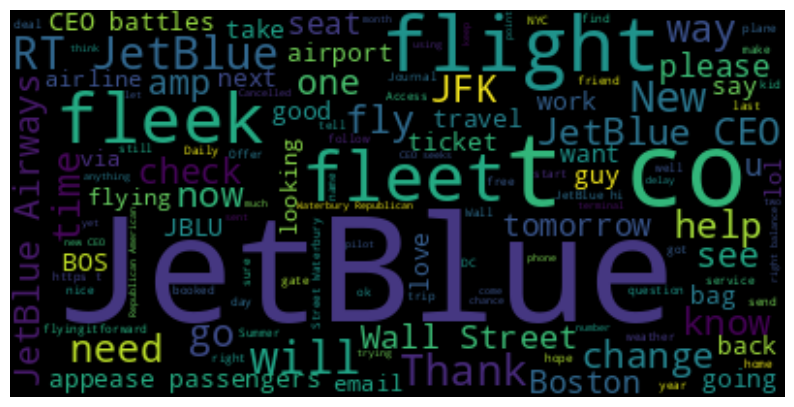

In [45]:
generate_word_cloud(df_delta_neutral, 'text')

This neutral word cloud of Delta Airlines shows us that the tweets were related to **Good/Fleek service, flight experience to/from New York (JFK)/ Boston, CEO Battles**.

## Virgin America

In [46]:
df_virgin = dt[dt['airline'] == 'Virgin America']
df_virgin.head()

airline_sentiment  airline_sentiment_confidence         airline        name  \
0           neutral                        1.0000  Virgin America     cairdin   
1          positive                        0.3486  Virgin America    jnardino   
2           neutral                        0.6837  Virgin America  yvonnalynn   
3          negative                        1.0000  Virgin America    jnardino   
4          negative                        1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created  
0  2015-02-24 11:35:52 -0800  
1  2015-02-24 11:15:59 -0800  
2  2015-02-24 11:15:48 -0800  
3  2015-02-24 11:15:36 -0800  
4  2015-02-24 11:14:45 -0800

### Value Counts of Sentiment

In [65]:
calculate_sentiment_count(df_virgin,'airline_sentiment')

negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64

### % share in Virgin American Airlines

In [47]:
percentages = calculate_sentiment_percentage(df_virgin, 'airline_sentiment')
print(percentages)

negative    35.912698
neutral     33.928571
positive    30.158730
Name: airline_sentiment, dtype: float64


In [48]:
df_virgin_positive = df_virgin[df_virgin['airline_sentiment']=='positive']
df_virgin_neutral = df_virgin[df_virgin['airline_sentiment']=='neutral']
df_virgin_negative = df_virgin[df_virgin['airline_sentiment']=='negative']

### Virgin American Airlines Positive WordCloud

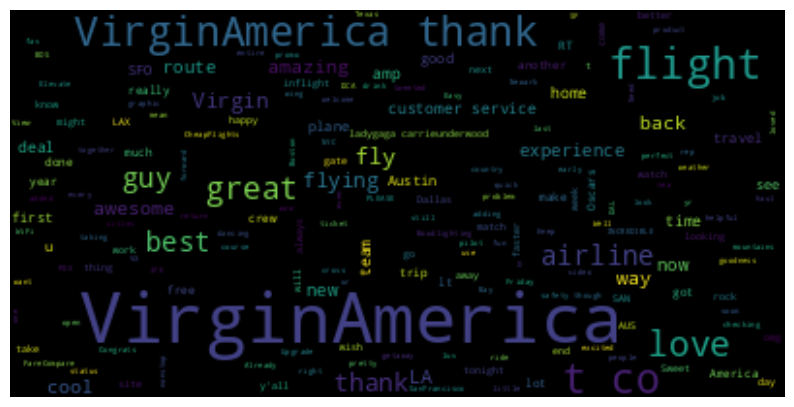

In [49]:
generate_word_cloud(df_virgin_positive, 'text')

This positive word cloud of Virgin Airlines shows us that the tweets were related to **Good service, great flight experience to/from Dallas**.

### Virgin American Airlines Negative WordCloud

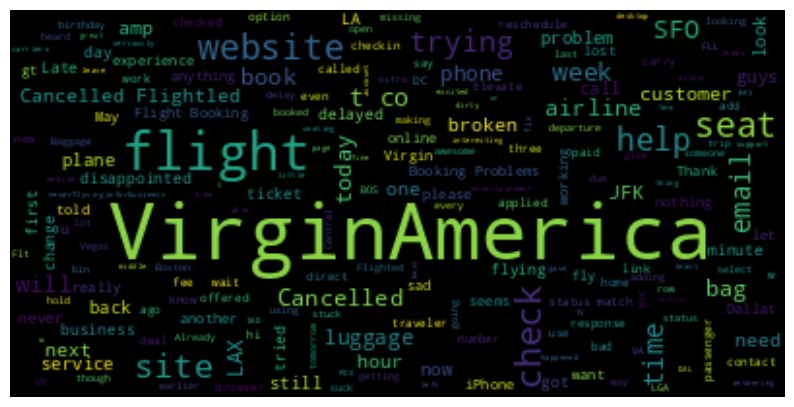

In [50]:
generate_word_cloud(df_virgin_negative, 'text')

This negative word cloud of Virgin Airlines shows us that the tweets were related to **delays & cancellation of flight, customer service, especially LA Airport**.

### Virgin American Airlines Neutral WordCloud

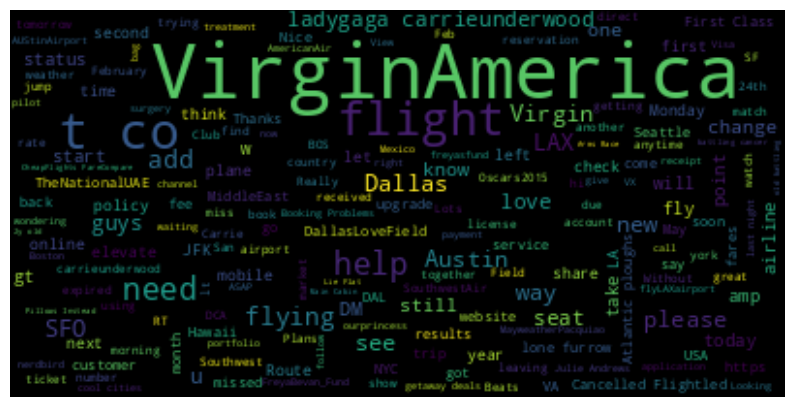

In [51]:
generate_word_cloud(df_virgin_neutral, 'text')

This neutral word cloud of Virgin Airlines shows us that the tweets were related to **Dallas(Austin)|LA|Seattle, Routes, Lady Gaga**, which may contribute to positive contribute.

## Complete Overall Dataset Reviews

In [52]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

#### % share in All American Airlines

In [66]:
percentages = calculate_sentiment_percentage(df, 'airline_sentiment')
print(percentages)

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64


In [71]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

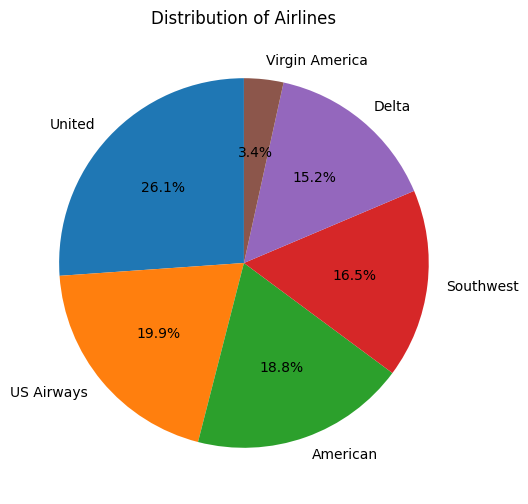

In [73]:
airline_counts = df['airline'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Airlines')

plt.show()

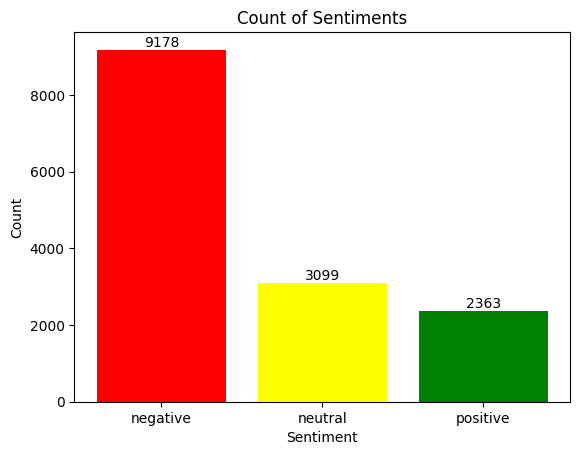

In [77]:
sentiments_total = df['airline_sentiment'].value_counts()

plt.bar(sentiments_total.index, sentiments_total, color=['red', 'yellow', 'green'])

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Sentiments')

for i, count in enumerate(sentiments_total):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

The analysis of Tweets shows that people were not happy with services from Airport Authorities and the Airlines. Still we had some positive tweets as well which should sustain.

Summary with respective wordcloud withdraws the key performace indicators that are mentioned by the traveller which is based upon the Airline Company they used for their journey, especially from Denver, Los Angeles, Dallas and New York. Hence getting feedback from other Airports can also help in improving the services.



    Most Mentioned Airline in Dataset was - UNITED AIRLINES

    Airline which Most Positive Feedback in Dataset were - 1. Virgin Airlines - 30% 2. Delta Airlines - 24% 3. Southwest Airlines - 23%

    Airline which Most Negative Feedback in Dataset were - 1. US Airways - 77% 2. United Airlines & American Airlines - 69%

    END OF REPORT